# Machine Learning - Ex 2
---

First, we load libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem 1: Logistic Regression

Loading data and X and y variables

In [6]:
data1 = np.loadtxt("./data/ex2data1.txt", delimiter=',')
X = data1[:,[0,1]]
y = data1[:,2]

### Problem 1.1: Visualizing the Data

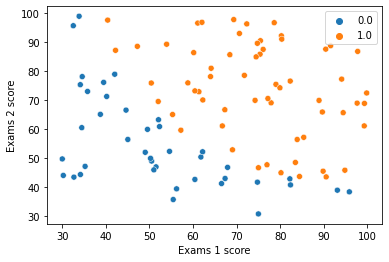

In [90]:
plt.figure()
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y)
# plt.scatter(x=X[:,0],y=X[:,1], c=y)
plt.ylabel("Exams 2 score")
plt.xlabel('Exams 1 score')
plt.show()
#need to learn how to change labels in seaborn.

### Problem 1.2: Implementation

First, we need to define the sigmoind fuction using the new eq $h_{\theta}(x) = g(\theta^T x)$ where the sigmoind functoin is
$g(z) = \frac{1}{1 + e^{-z}}$

In [94]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [108]:
sigmoid(0)

0.5